### Zillow Sales City YoY % Change

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
import geopandas as gpd
import pandas as pd
import numpy as np

In [2]:
# allow max rows and colums to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# make display wider
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:88% !important; }</style>"))

In [3]:
geo = gpd.read_file('data/shapefiles/Zil_City_Reg.geojson')
geo.head()

,GEOID10,zip_id,Z_city,Z_state,Z_city_state,geometry
0,11563,11563.0,Lynbrook,NY,Lynbrook_NY,"MULTIPOLYGON (((-73.69078 40.65058, -73.69040 ..."
1,11560,11560.0,Locust Valley,NY,Locust Valley_NY,"MULTIPOLYGON (((-73.62102 40.89851, -73.61929 ..."
2,10701,10701.0,Yonkers,NY,Yonkers_NY,"MULTIPOLYGON (((-73.91127 40.91621, -73.91113 ..."
3,08512,8512.0,Cranbury Township,NJ,Cranbury Township_NJ,"MULTIPOLYGON (((-74.56841 40.28678, -74.56753 ..."
4,08742,8742.0,Point Pleasant,NJ,Point Pleasant_NJ,"MULTIPOLYGON (((-74.09518 40.09370, -74.09458 ..."


In [4]:
df = pd.read_csv('data/Zil_Sale_CityYoY.csv')

In [5]:
dates = df.columns.tolist()[1:]

In [6]:
cities = pd.merge(geo,df,how='left',left_on='Z_city_state',right_on='id')

In [7]:
cities = cities.drop(columns=['GEOID10', 'zip_id', 'Z_city_state','Z_city','Z_state'])
#cities.head()

In [8]:
cities = pd.melt(cities,id_vars=['id','geometry'],value_vars=dates)
cities.head()

,id,geometry,variable,value
0,NaN,"MULTIPOLYGON (((-73.69078 40.65058, -73.69040 ...",Oct_19,NaN
1,NaN,"MULTIPOLYGON (((-73.62102 40.89851, -73.61929 ...",Oct_19,NaN
2,Yonkers_NY,"MULTIPOLYGON (((-73.91127 40.91621, -73.91113 ...",Oct_19,-0.046667
3,NaN,"MULTIPOLYGON (((-74.56841 40.28678, -74.56753 ...",Oct_19,NaN
4,Point Pleasant_NJ,"MULTIPOLYGON (((-74.09518 40.09370, -74.09458 ...",Oct_19,-0.093264


In [9]:
#keep as many geos as possible and replace nans
cities.value = cities.value.fillna(0)

In [10]:
cities.describe()

,value
count,9898.000000
mean,-0.009203
std,0.168631
min,-0.642857
25%,-0.015748
50%,0.000000
75%,0.000000
max,1.947674


In [11]:
months = cities.variable.unique().tolist()

In [12]:
months

['Oct_19',
 'Nov_19',
 'Dec_19',
 'Jan_20',
 'Feb_20',
 'Mar_20',
 'Apr_20',
 'May_20',
 'Jun_20',
 'Jul_20',
 'Aug_20',
 'Sep_20',
 'Oct_20',
 'Nov_20']

In [19]:
def monthly_maps(gdf,month):
    fig, ax = plt.subplots(1, figsize = (20,16))
    ax.axis('off')
    divnorm = mpl.colors.TwoSlopeNorm(vmin= -0.65, vcenter = 0,vmax = 1.0) # within a 95% accuracy one way or other
    sm = plt.cm.ScalarMappable(cmap='RdBu', norm=divnorm)
    sm.set_array([])
    gdf.plot(column = 'value', cmap = 'RdBu', edgecolor="face", norm = divnorm, linewidth=0.4, ax = ax)
    fig.colorbar(sm)
    ax.set_title(f'Y-o-Y % Change in Sales {month[:3]} 20{month[-2:]}', color = 'k',  fontsize = 15)
   #             xy = (0.6,.05), xycoords = 'figure fraction', fontsize = 11, color = 'k')
    plt.savefig(f'Zillow/City_Sales/{month}.jpg', dpi = 400) # saving each scatter plot by month

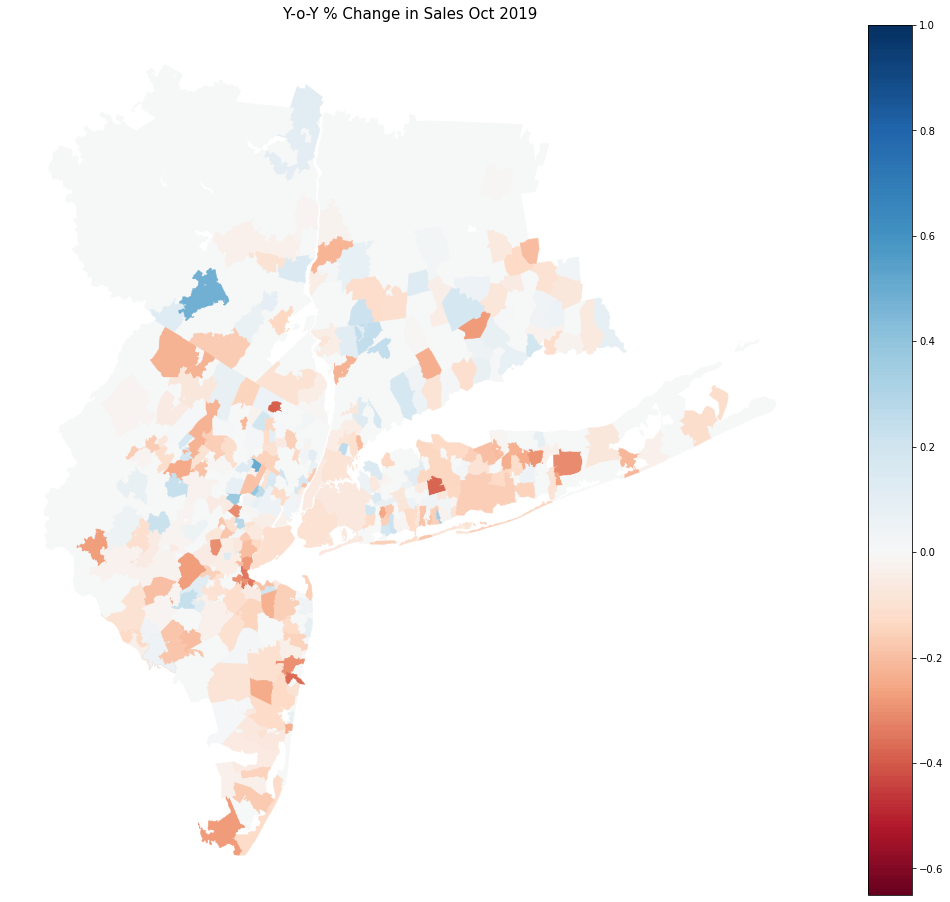

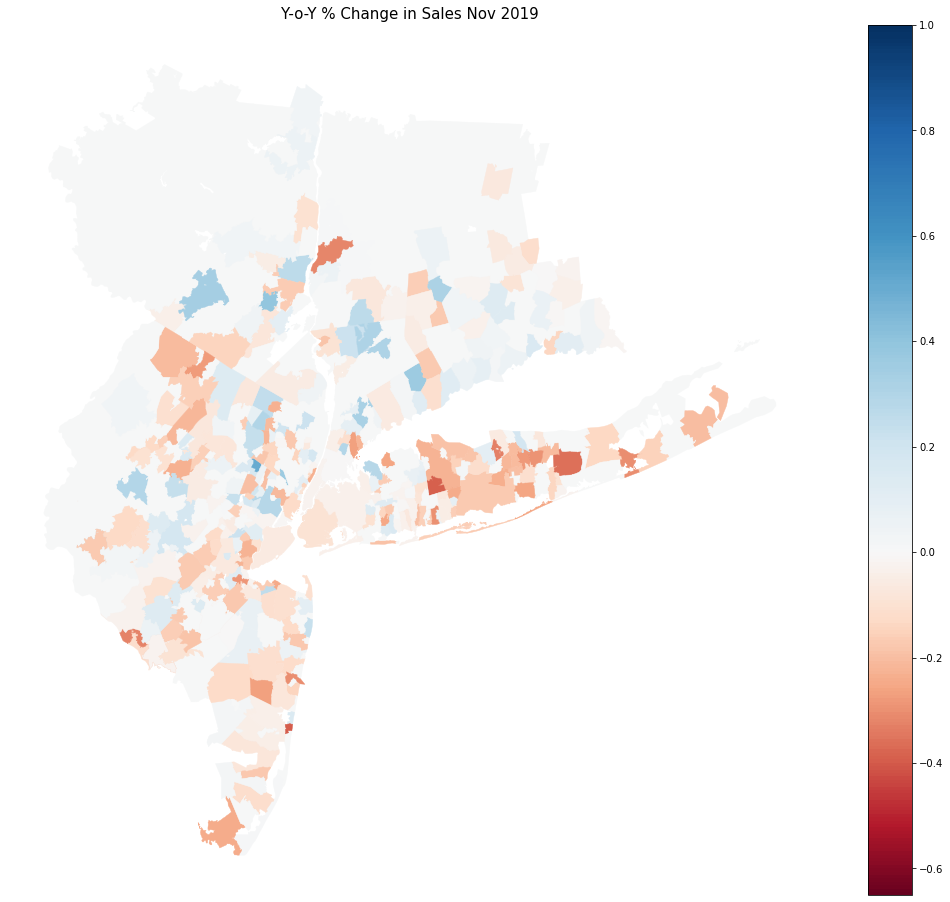

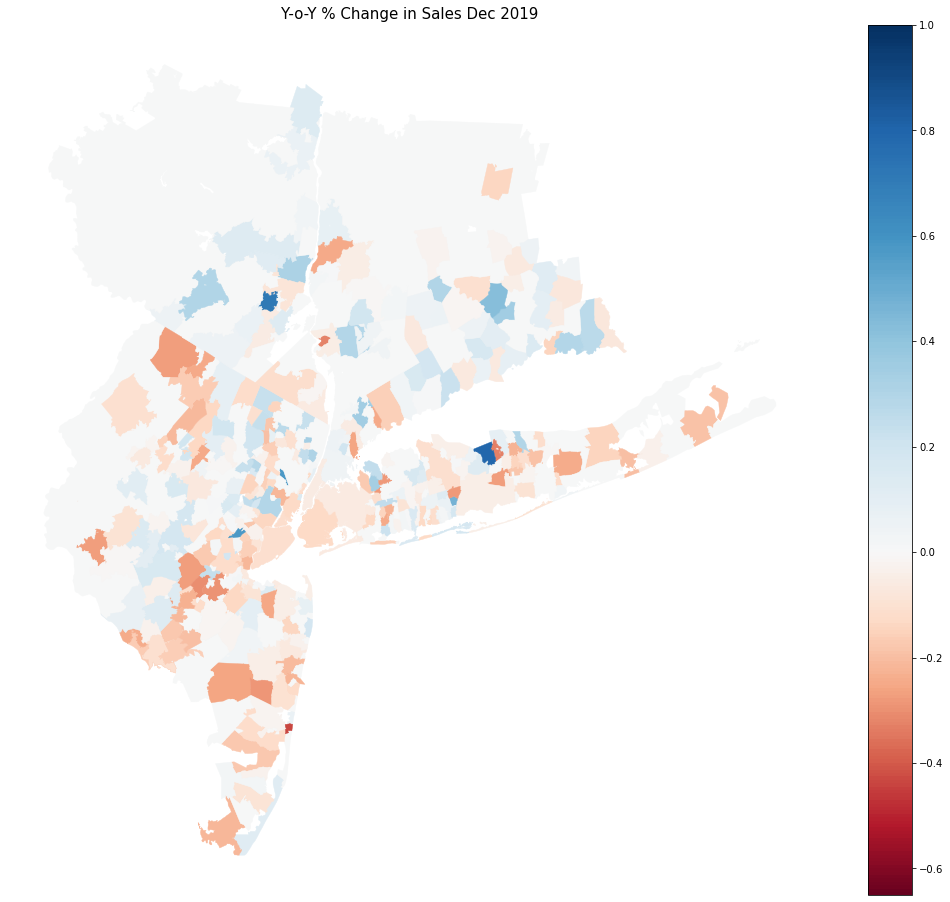

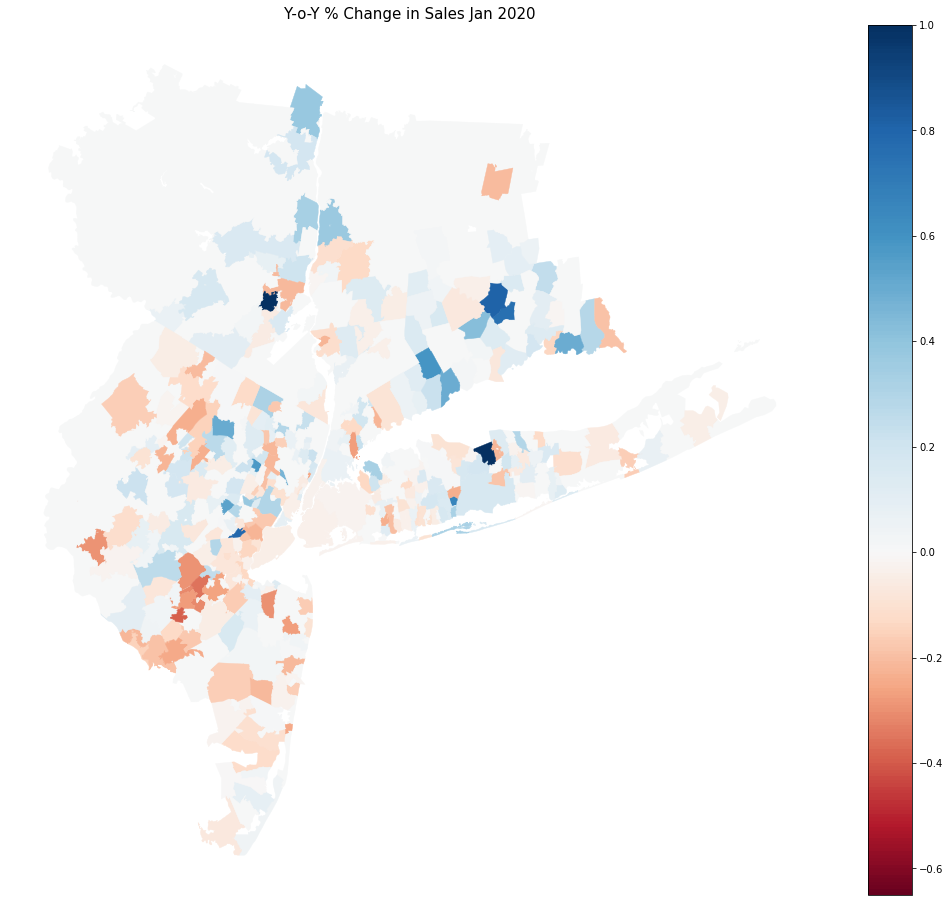

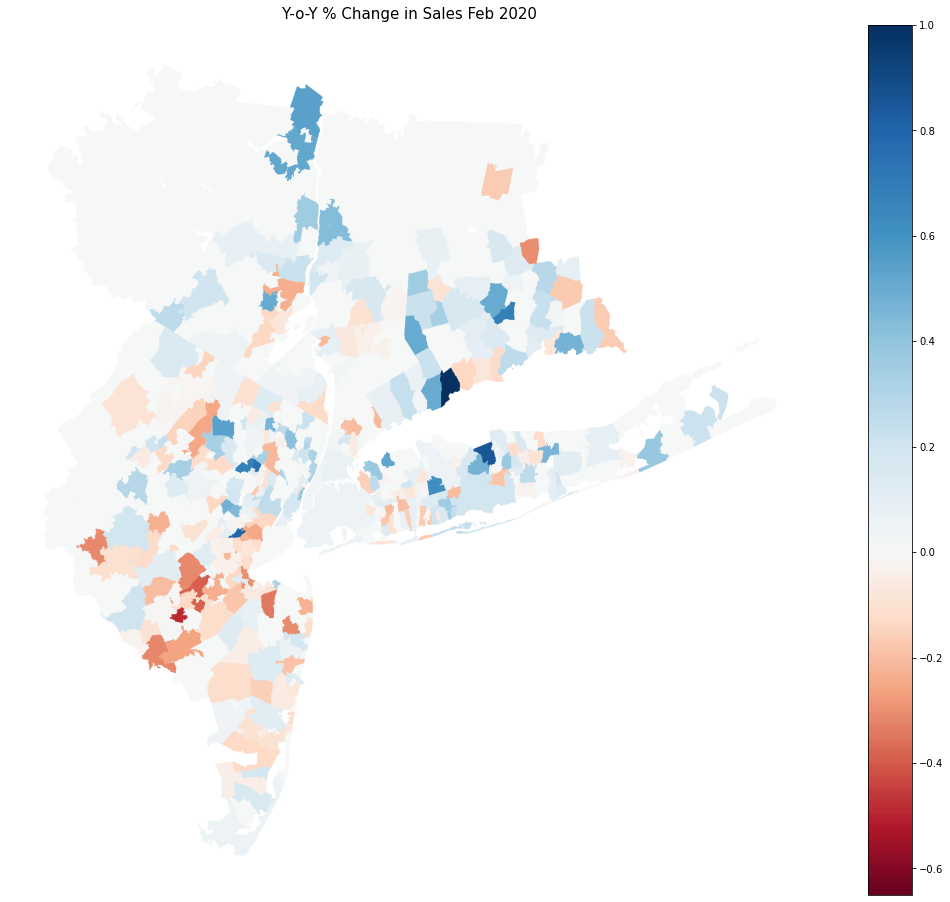

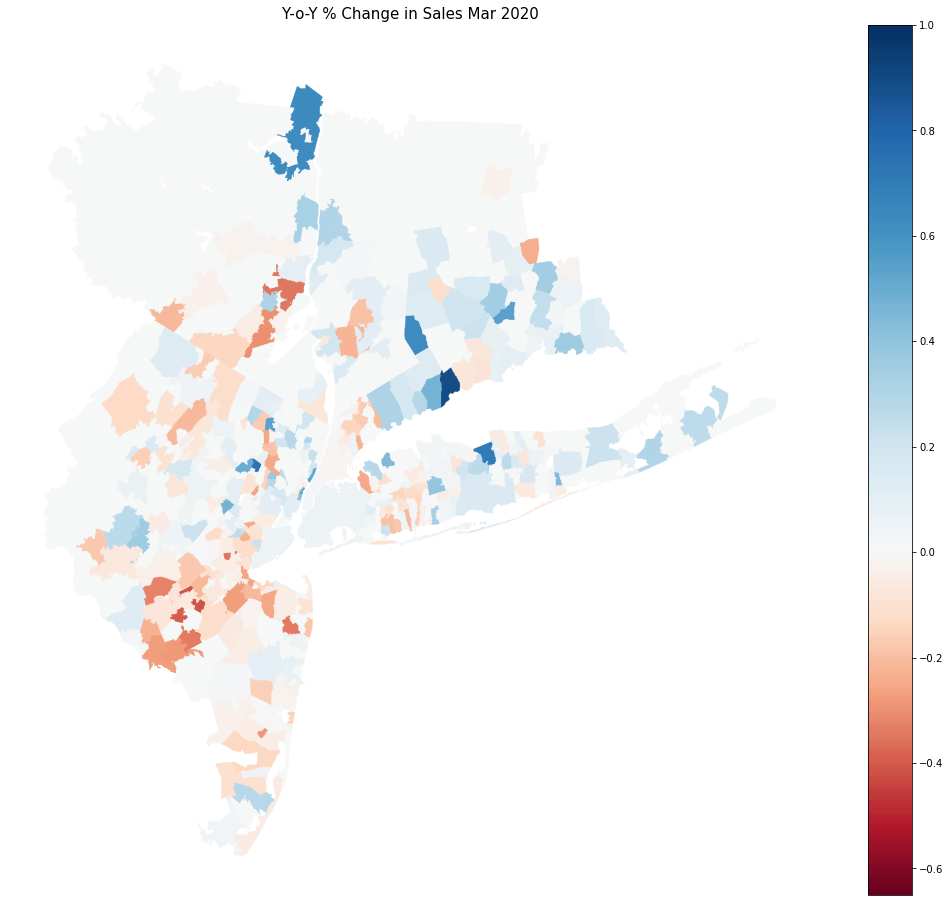

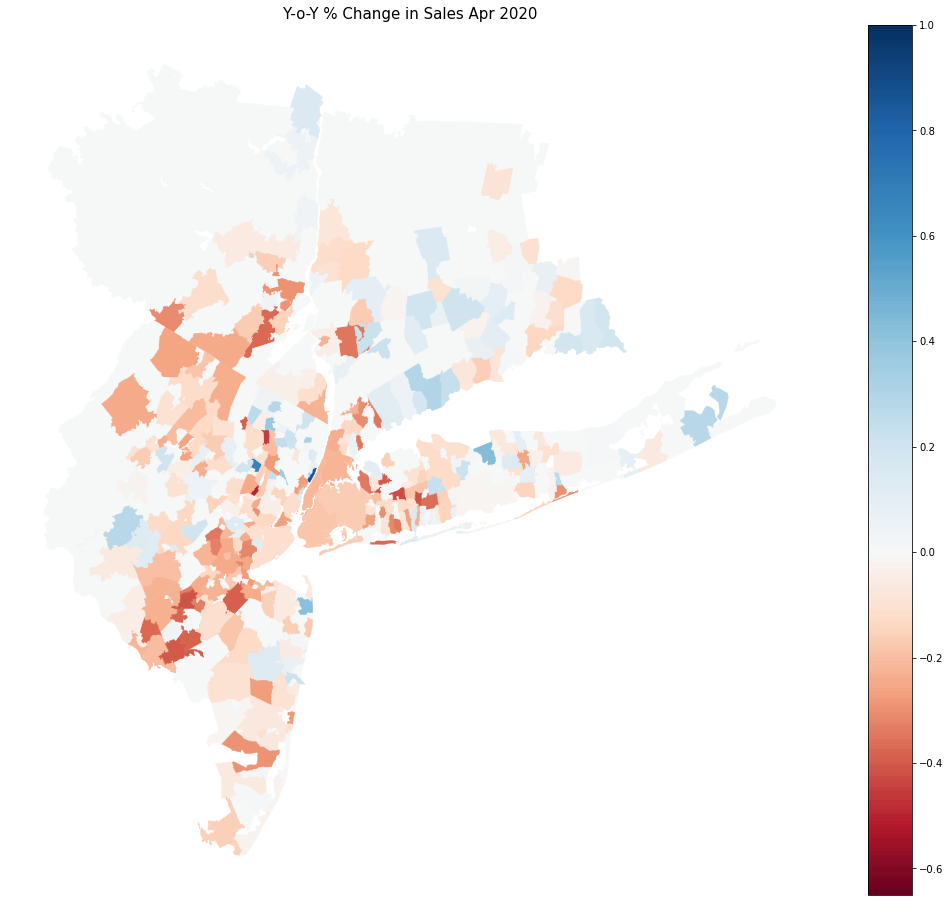

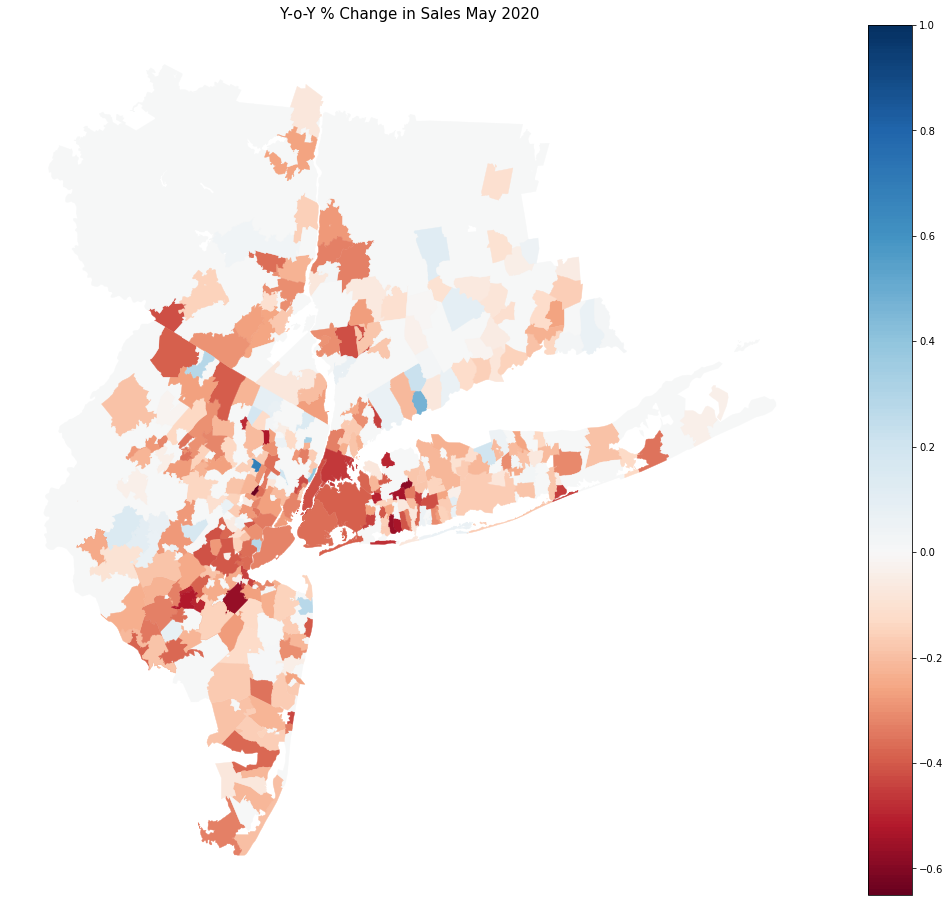

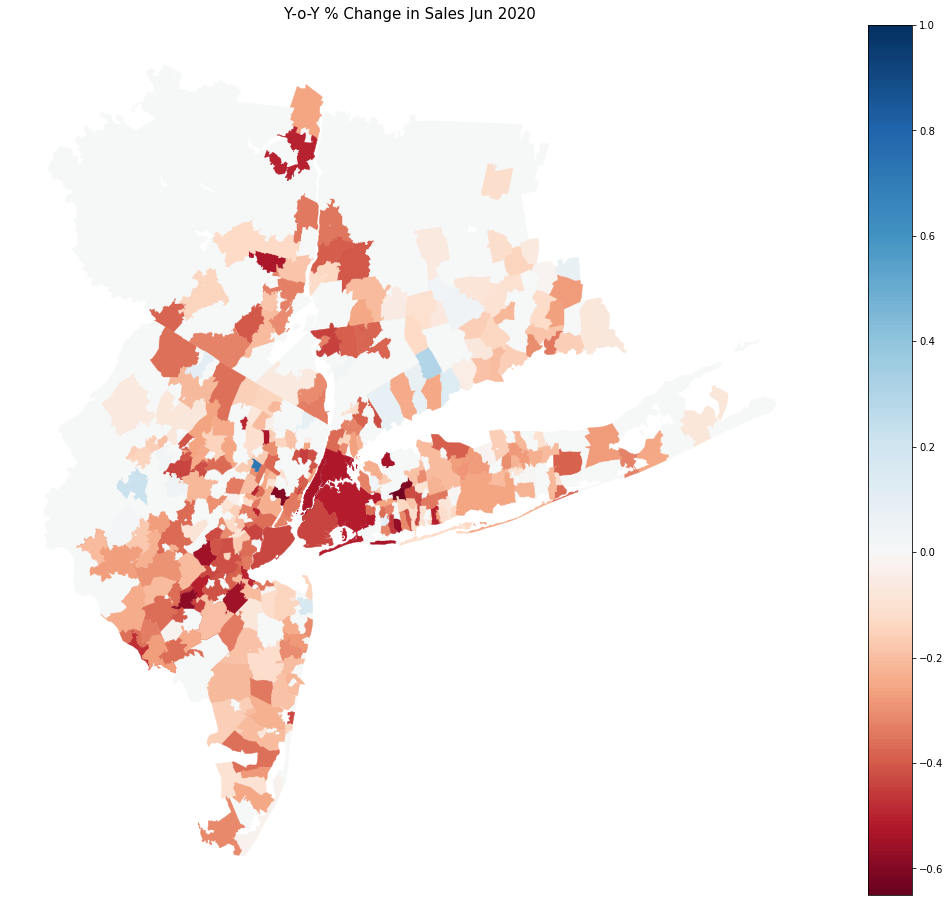

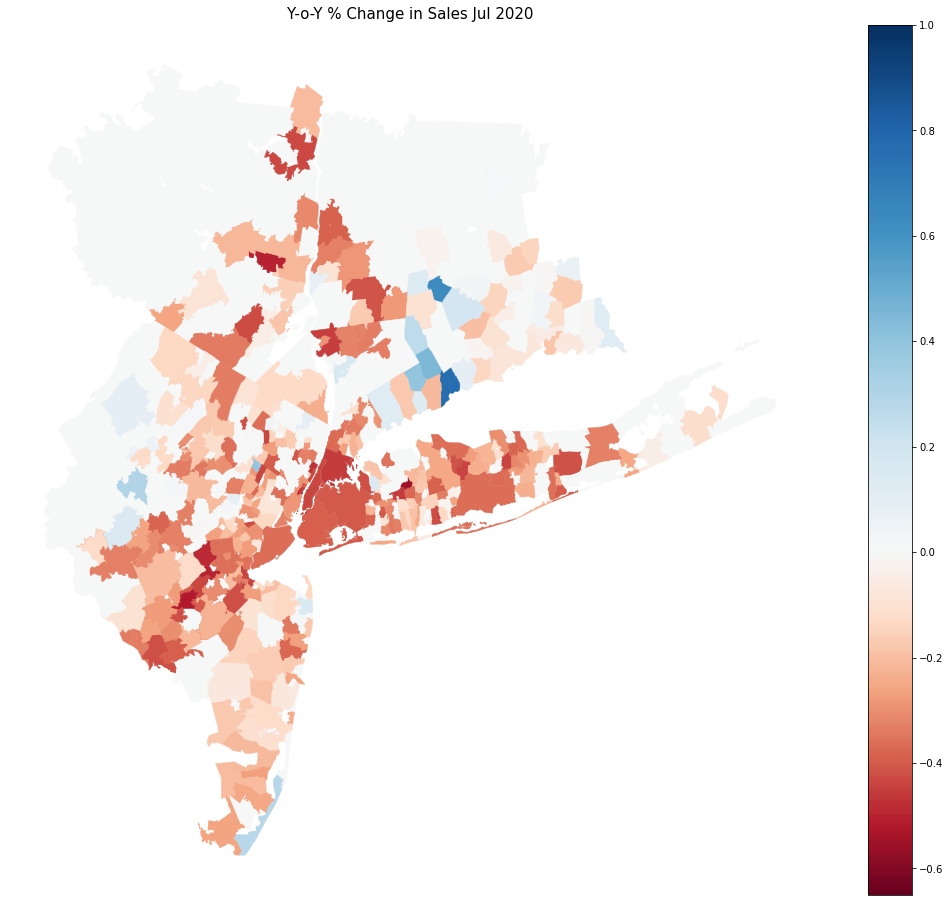

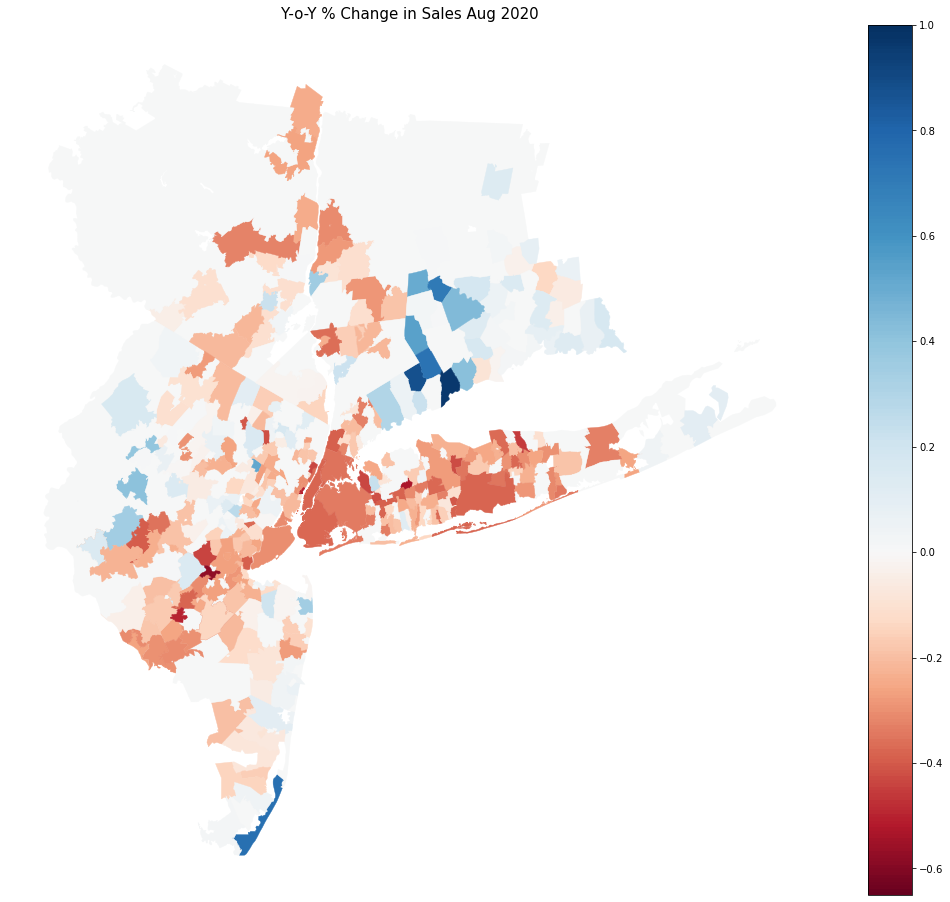

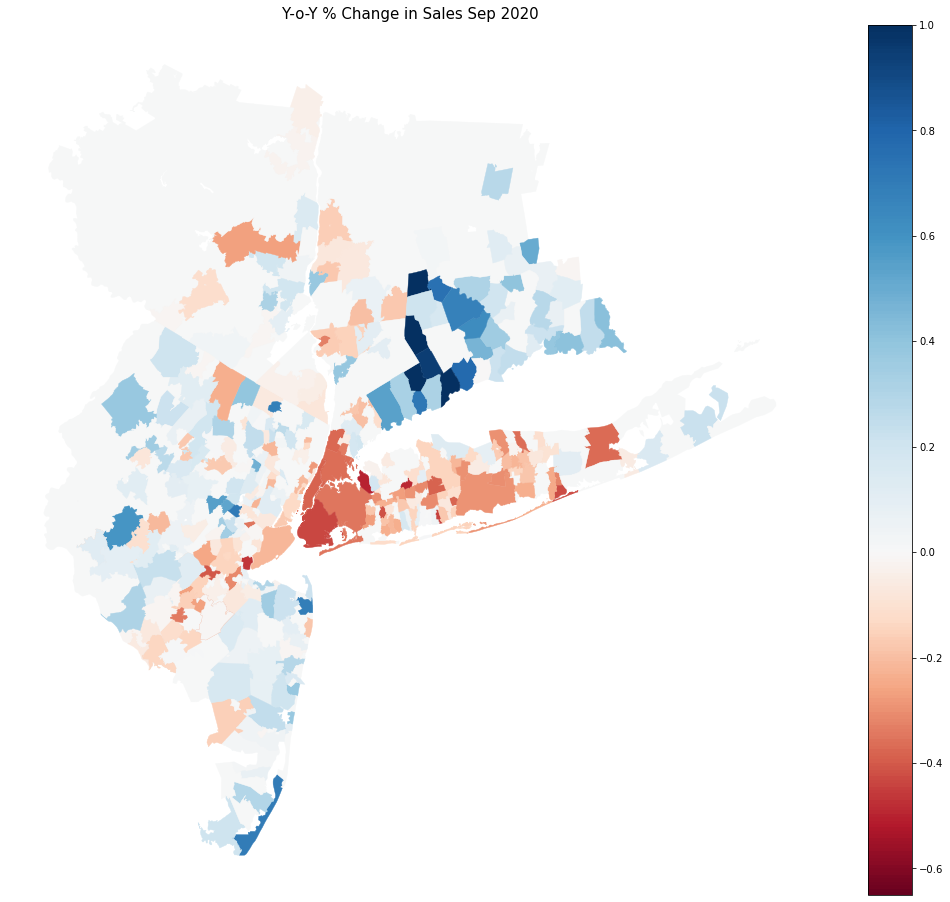

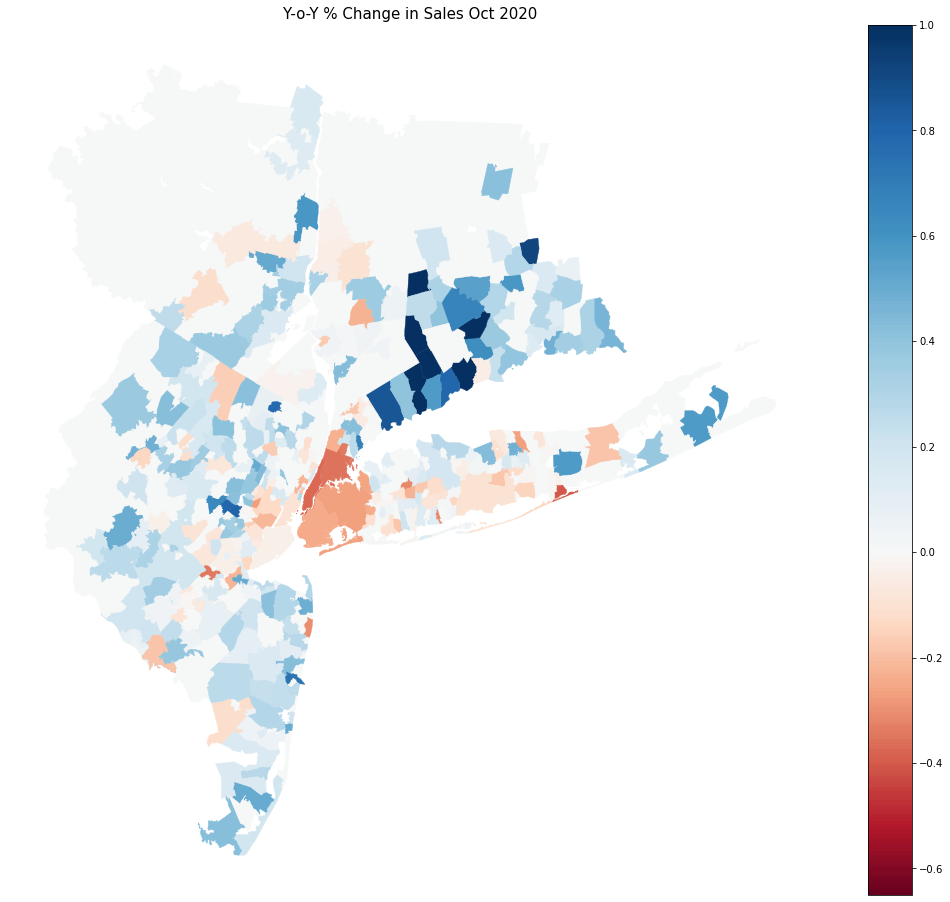

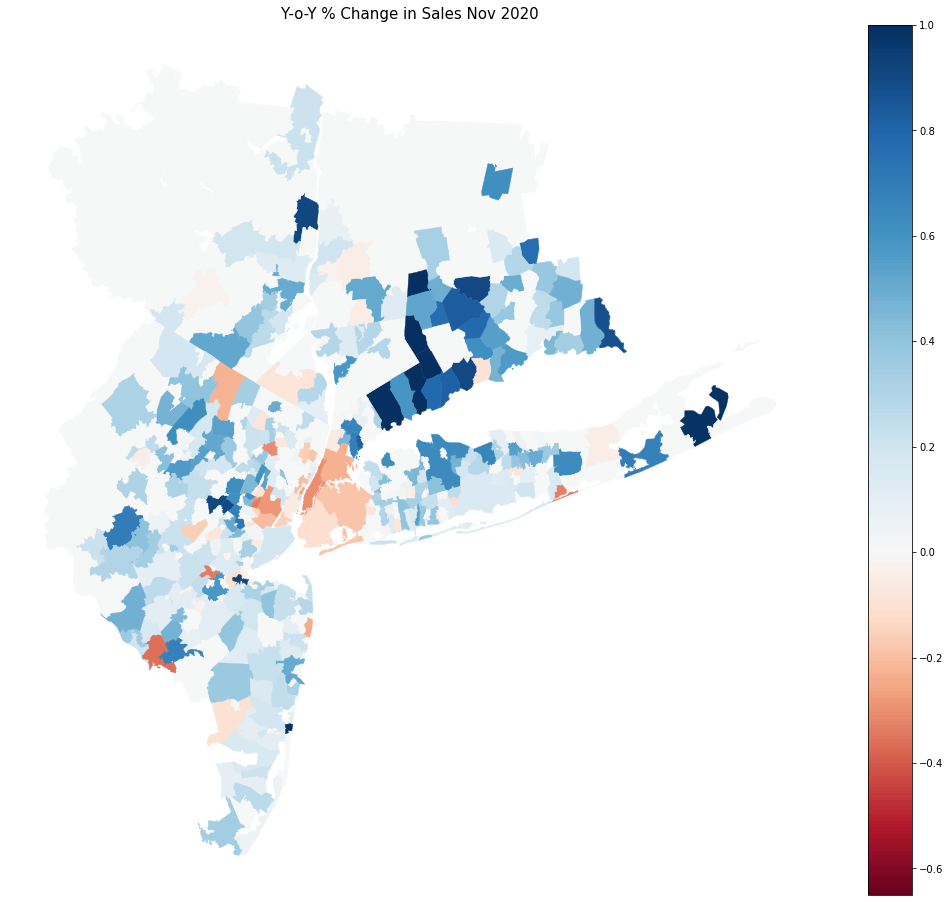

In [20]:
for m in months:
    gdf = cities[cities['variable'].isin([m])]
    monthly_maps(gdf,m)